# PyOD : Python toolbox for Outlier Detetction 
## CSCE 670 :: Spotlight :: Spring 2020

### Submitted by: Ananya Bothra

***
“Outliers are not necessarily a bad thing. These are just observations that are not following the same pattern as the other ones. But it can be the case that an outlier is very interesting. For example, if in a biological experiment, a rat is not dead whereas all others are, then it would be very interesting to understand why. This could lead to new scientific discoveries.  So, it is important to detect outliers.” 
                                                                           
                                                                       – Pierre Lafaye de Micheaux, Author and Statistician
***

In statistics, an outlier is a datapoint which is significantly distant from other observations in the dataset. They can substantially impact statistical analysis and modelling tasks. Outlier detection is the process of determining these outlying data points from the entire dataset/ population. In real world, dedicated outlier detection algorithms have immense impact in industry like fraud detection in finance, intrusion detection in network security, diagnosing fault in mechanics etc.

Due to this, several outlier detection packages are available across multiple programming languages. One such comprehensive toolbox is **PyOD** which is used for scalable outlier detection in Python.

### Steps to install: 

PyOD is compatible with both Python versions 2 and 3 and major operating systems like Windows, Linux and MACOS. Let us now see the instructions to install PyOD:

`pip install pyod`

`pip install --upgrade pyod`  # to upgrade and check if the latest version has been installed

**Note**  : PyOD also contains some neural network based models which are implemented using Keras. The user needs to download Keras or TensorFlow manually if these models are to be used as PyOD does not automatically install the same for the user.

### Algorithms provided by PyOD:

PyOD supports more than 20 algorithms which cover not only classical outlier detection techniques such as local outlier factor
but also recent neural network architectures such as autoencoders or adversarial models. Below is a table listing twenty such algorithms supported by PyOD:

| **Sr. No.** | **Outlier Detection Method** | **Category**|
| --- | --- | --- |
| 1 | LOF (Local Outlier Factor) | Proximity |
| 2 | CBLOF (Cluster-Based Local Outlier Factor) | Proximity |
| 3 | kNN (k Nearest Neighbour) | Proximity |
| 4 | AvgkNN (Average k Nearest Neighbour) | Proximity |
| 5 | OCSVM (One Class Support Vector Machine)) | Linear Model |
| 6 | LOCI (Local Correlation Integral) | Proximity |
| 7 | PCA (Principal Component Analysis) | Linear Model |
| 8 | MCD (Minimum Covariance Determinant) | Linear Model |
| 9 | Feature Bagging | Ensembling |
| 10 | ABOD (Angle-Based Outlier Detector) | Proximity |
| 11 | Isolation Forest | Ensembling |
| 12 | HBOS (Histogram Based Outlier Score) | Proximity |
| 13 | SOS (Stochastic Outlier Score) | Proximity |
| 14 | AutoEncoder | Neural Net |
| 15 | AOM (Average of Maximum) | Ensembling |
| 16 | MOA (Maximum of Average) | Ensembling |
| 17 | SO-GAAL (Single-Objective Generative Adversarial Active Learning) | Neural Net |
| 18 | MO-GAAL (Multiple-Objective Generative Adversarial Active Learning) | Neural Net |
| 19 | XGBOD (Extreme Gradient Boosting Outlier Detection) | Ensembling |
| 20 | LSCP (Locally Selective Combination in Parallel Outlier Ensembles) | Ensembling |

### Some extra utility functions provided by PyOD:

 - *pyod.utils.data.generate_data* is used to generate random data with outliers. The inliers are generated from a multivariate Gaussian distribution and outliers are generated by a uniform distribution. The percentage of outliers to be genrated can also be specified and passed as contamination argument to the function.
 - *pyod.utils.data.evaluate_print* is used to print the evaluation metrics of the outlier algorithm.
 - *pyod.utils.data.get_outliers_inliers* is used to separate inliers and outliers from the data.
 - *pyod.utils.example.data_visualize* is used for demonstrating the synthetic samples generated by generate_data_cluster function graphically.
 - *pyod.utils.example.visualize* is a utility function for visualizing the results.

###  Running PyOD on a simulated dataset: 

We start by importing the necessary libraries.

In [12]:
import numpy as np
import pandas as pd
import pyod
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy import stats
from pyod.utils.data import generate_data, get_outliers_inliers, evaluate_print
from pyod.utils.example import visualize

Now, we generate a random dataset with 15% outliers and plot it. The inliers are marked in purple and the outliers are marked in yellow.

C:\Users\Ananya\Anaconda3\lib\site-packages\pyod\utils\data.py:190: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


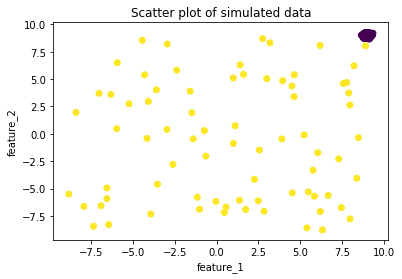

In [13]:
contamination = 0.15  # percentage of outliers
n_train = 500         # number of training points
n_test = 500          # number of testing points
n_features = 2        # number of features
X_train, y_train, X_test, y_test = generate_data(n_train=n_train, n_test=n_test, n_features= n_features, contamination=contamination)

feature1_train = []
feature2_train = []
feature1_test = []
feature2_test = []

for i in range(len(X_train)):
    feature1_train.append(X_train[i][0])
    feature2_train.append(X_train[i][1])
    feature1_test.append(X_test[i][0])
    feature2_test.append(X_test[i][1])

x_outliers, x_inliers = get_outliers_inliers(X_train,y_train)

n_inliers = len(x_inliers)
n_outliers = len(x_outliers)
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
    
plt.scatter(feature1_train,feature2_train,c=y_train)
plt.title('Scatter plot of simulated data')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show()

Now we import the models using which we would detect outliers in our simulated dataset :ABOD, KNN, Isolation Forest. 

In [21]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.hbos import HBOS
from pyod.models.auto_encoder import AutoEncoder

#####  K-Nearest Neighbour (KNN) 

The underlying philosophy of the classification algorithm KNN is used for detecting outlier. For each data point, the distance to its kth nearest neighbour is seen as the outlying score. PyOD supports three different variations of KNN detectors:
 - *Mean* : This uses the avarage distance of all k neighbours as the outlying score
 - *Median* : This uses the median distance of the k neighbours as the outlying score
 - *Largest* : This uses the distance to the kth neighbour as the outlying score

We now proceed to check how the algorithm is performing in detecting outliers by fitting the dataset to KNN model:

In [15]:
knn=KNN(contamination= contamination)
knn.fit(X_train)
# prediction labels and outlier scores of the training data
y_train_pred = knn.labels_  
y_train_scores = knn.decision_scores_ 
# prediction on the test data
y_test_pred = knn.predict(X_test)  
y_test_scores = knn.decision_function(X_test)
# no of errors in test set
n_errors = (y_test_pred != y_test).sum()
print('No of Errors in test set: {}'.format(n_errors))
# accuracy in test set
print('Accuracy in test set: {}'.format((n_test-n_errors)/n_test))

evaluate_print("KNN", y_test, y_test_scores)


No of Errors in test set: 0
Accuracy in test set: 1.0
KNN ROC:1.0, precision @ rank n:1.0


Let us graphically visualize the prediction procedure:

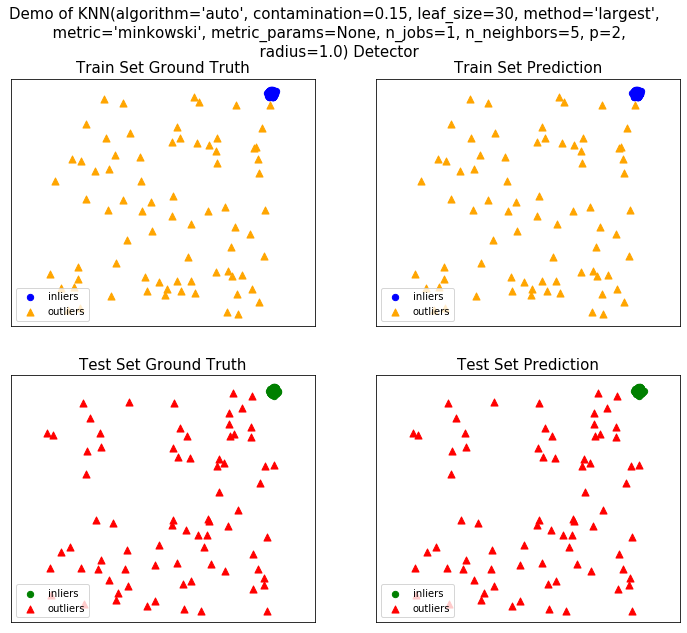

In [17]:
visualize(knn, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)


##### Angle-Based Outlier Detection (ABOD)

ABOD detects outliers by considering the variances of the angles between the difference vectors of data objects. This methodology is far less sensitive to increasing dimensionality of dataset than the standard distance based outlier detection mechanism. PyOD offers two different versions of ABOD:
 - *Fast ABOD* : This uses k-nearest neighbour for approximation.
 - *Original ABOD* : This considers all training points.
 
In the below code snippet, we proceed to show the performance of an Angle based outlier detector with PyOD:

In [22]:
Abod = ABOD(method="fast") # initialize detector
Abod.fit(X_train)

y_test_pred = Abod.predict(X_test) # binary labels
y_test_scores = Abod.decision_function(X_test) # raw outlier scores
y_test_proba = Abod.predict_proba(X_test) 

n_errors = (y_test_pred != y_test).sum()
print('No of Errors in test set: {}'.format(n_errors))
#accuracy in test set
print('Accuracy in test set: {}'.format((n_test-n_errors)/n_test))

evaluate_print("ABOD", y_test, y_test_scores)


No of Errors in test set: 31
Accuracy in test set: 0.938
ABOD ROC:1.0, precision @ rank n:1.0


Again, we use visualize for visualizing the prediction:

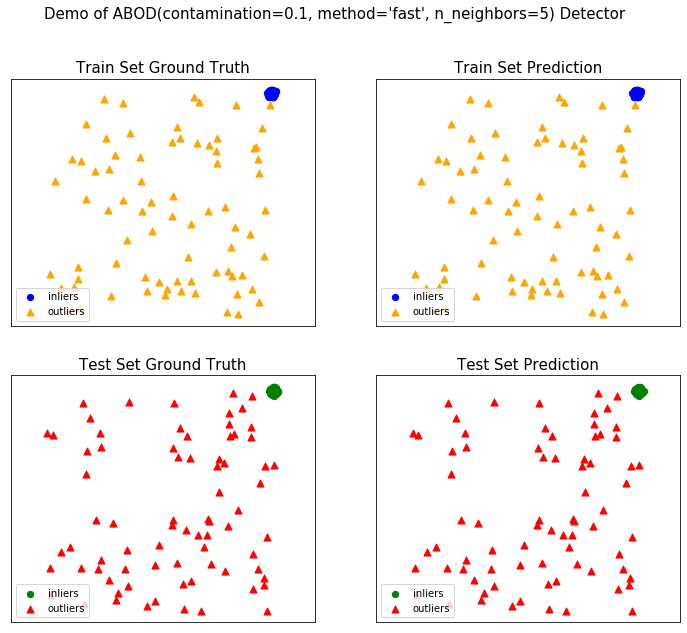

In [26]:
visualize(Abod, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

##### Isolation Forest 

Here data partitioning is done using a set of trees and an outlying score is calculated based on how isolated a point is in the structure. This algorithm performs well on multidimensional data. PyOD uses scikit-learn library internally for this implementation.


In [24]:
Iforest = IForest(contamination=contamination,random_state=40) # initialize detector
Iforest.fit(X_train)

y_test_pred = Iforest.predict(X_test) # binary labels
y_test_scores = Iforest.decision_function(X_test) # raw outlier scores
y_test_proba = Iforest.predict_proba(X_test) 

n_errors = (y_test_pred != y_test).sum()
print('No of Errors in test set: {}'.format(n_errors))
#accuracy in test set
print('Accuracy in test set: {}'.format((n_test-n_errors)/n_test))

evaluate_print("Isolation Forest", y_test, y_test_scores)


No of Errors in test set: 0
Accuracy in test set: 1.0
Isolation Forest ROC:1.0, precision @ rank n:1.0


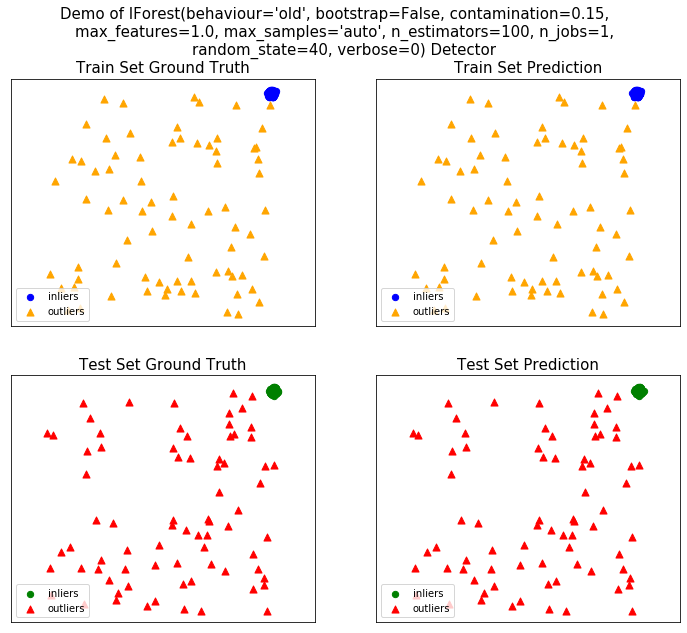

In [29]:
visualize(Iforest, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)


##### Histogram based outlier detector 

An efficient unsupervised method of outlier detection, HBOD assumes feature independence and calculates outlying score by construction of histograms. It achieves less precision but is much faster than multivariate approaches.

In [28]:
HBOD = HBOS(contamination=contamination) # initialize detector
HBOD.fit(X_train)

y_test_pred = HBOD.predict(X_test) # binary labels
y_test_scores = HBOD.decision_function(X_test) # raw outlier scores
y_test_proba = HBOD.predict_proba(X_test) 

n_errors = (y_test_pred != y_test).sum()
print('No of Errors in test set: {}'.format(n_errors))
#accuracy in test set
print('Accuracy in test set: {}'.format((n_test-n_errors)/n_test))

evaluate_print("HBOD", y_test, y_test_scores)

No of Errors in test set: 0
Accuracy in test set: 1.0
HBOD ROC:1.0, precision @ rank n:1.0


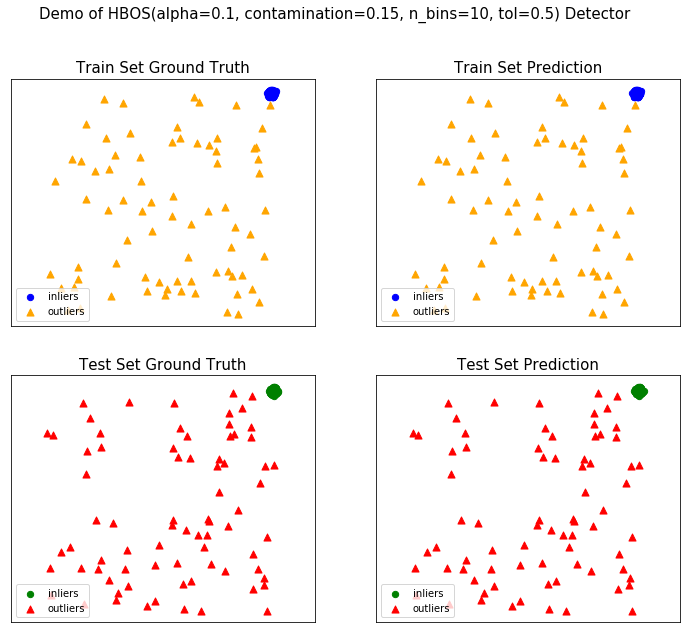

In [30]:
visualize(HBOD, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

Below is another visualization of the models in detecting outliers: (reference: https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/)

No of Errors :  Angle-based Outlier Detector (ABOD) 0
No of Errors :  K Nearest Neighbors (KNN) 0


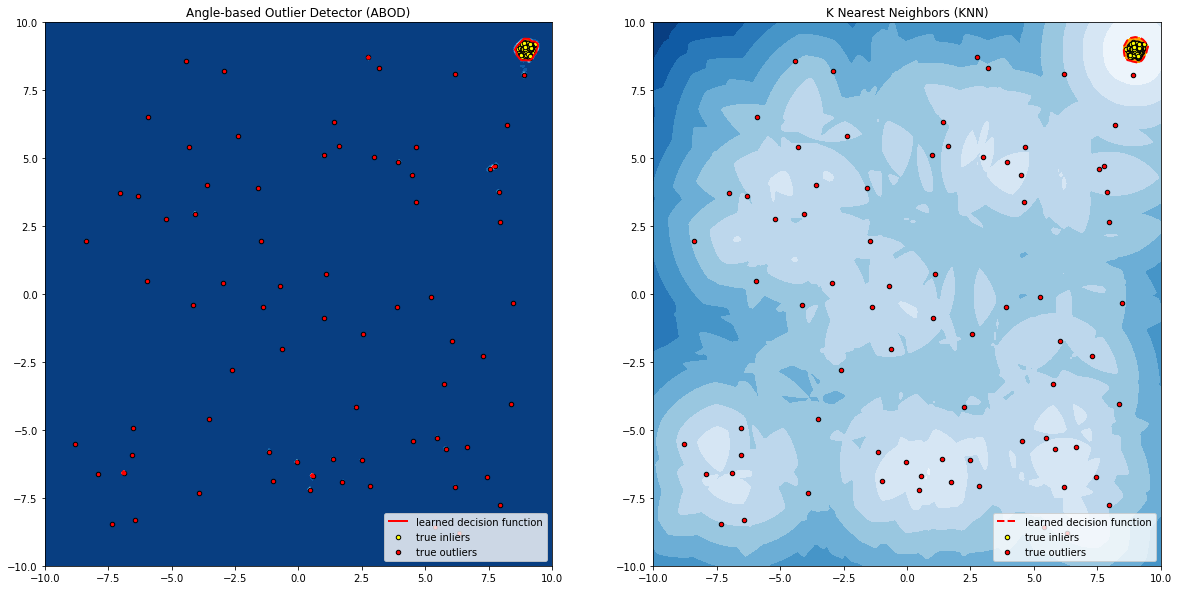

In [31]:
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=contamination),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=contamination),
}
plt.figure(figsize=(20, 10))

for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *contamination)

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with yellow dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='yellow',s=20, edgecolor='k') 
    # scatter plot of outliers with red dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='red',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
plt.show() 

##### AutoEncoder

Proximity based outlier detection algorithms like KNN suffer from the curse of dimensionality as they attempt to compute distances between data points in full feature space. Autoencoders come to rescue for dimensionality reduction, with non linear transformations and activation functions. Below, we demonstrate the process of outlier detection with AutoEncoder model of PyOD.We generate a random dataset (similar as before), but with 30 features this time to perform the modelling. 

C:\Users\Ananya\Anaconda3\lib\site-packages\pyod\utils\data.py:190: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


Text(0.5, 1.0, 'Original Data')

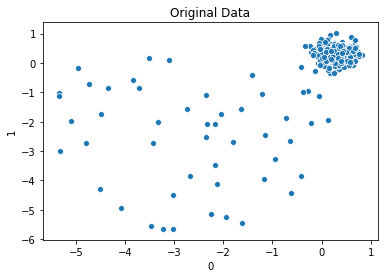

In [32]:
contamination = 0.1  # percentage of outliers
n_train = 500  # number of training points
n_test = 500  # number of testing points
n_features = 30 # Number of features

X_train,  y_train, X_test, y_test = generate_data(n_train=n_train, n_test=n_test, n_features= n_features, contamination=contamination,random_state=1000)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_test = pd.DataFrame(X_test)

#Dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X_train)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']

# Plot
import seaborn as sns
sns.scatterplot(x=0, y=1, data=X_train, palette='coolwarm')
plt.title('Original Data')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

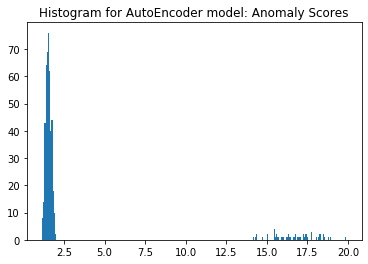

In [33]:
# Building the model: an autoencoder with 30 neurons in the input and output layers and two hidden layers with 10 neurons each
AE = AutoEncoder(hidden_neurons =[30, 10, 10, 30])
AE.fit(X_train)

# Get the outlier scores for the train data
y_train_scores = AE.decision_scores_  

# Predict the anomaly scores
y_test_scores = AE.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

# Plotting
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram for AutoEncoder model: Anomaly Scores")
plt.show()

In [34]:
df_test = X_test.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<5, 0, 1)
df_test['cluster'].value_counts()

df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.281139,0.286684,0.287858,0.281058,0.268104,0.295987,0.277551,0.281441,0.266766,0.285086,...,0.278836,0.288842,0.280467,0.283206,0.284516,0.275905,0.276045,0.280762,0.273264,1.540100
1,-2.530247,-2.580156,-2.590720,-2.529523,-2.412936,-2.663885,-2.497959,-2.532965,-2.400892,-2.565773,...,-2.509525,-2.599575,-2.524203,-2.548851,-2.560645,-2.483147,-2.484406,-2.526855,-2.459378,16.673886


Text(0.5, 1.0, 'Anomaly Scores')

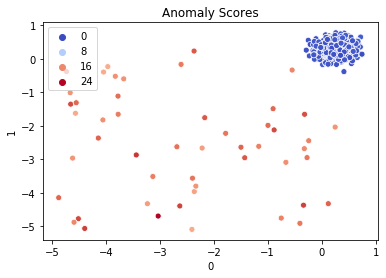

In [35]:
sns.scatterplot(x=0, y=1, hue=y_test_scores, data=df_test, palette='coolwarm')
plt.title('Anomaly Scores')

### Wrapping it up..

It can thus be concluded that, unlike other general purpose Python frameworks like scikit-learn or PyNomaly, PyOD serves as a dedicated toolbox for anomaly detection. It is a very helpful open source package where different approaches for detecting outliers have been brought together under the hood of a single and well documented API. The fact that the contributors are planning to extend the package by implementing models that would give better performance with geospatial and time series data is promising and would lay the foundation of more robust outlier detection using this package in future.

### References

 - https://pyod.readthedocs.io/en/latest/
 - https://github.com/yzhao062/pyod
 - https://towardsdatascience.com/anomaly-detection-with-pyod-b523fc47db9
 - https://towardsdatascience.com/detecting-and-modeling-outliers-with-pyod-d40590a96488
 - https://arxiv.org/abs/1901.01588
 - https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/
 - https://towardsdatascience.com/anomaly-detection-with-autoencoder-b4cdce4866a6
 - https://h1ros.github.io/posts/anomaly-detection-by-auto-encoder-deep-learning-in-pyod/
 
